In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

da = pd.read_csv(
    "C:/Users/eli/Desktop/nhanes_2015_2016.csv")

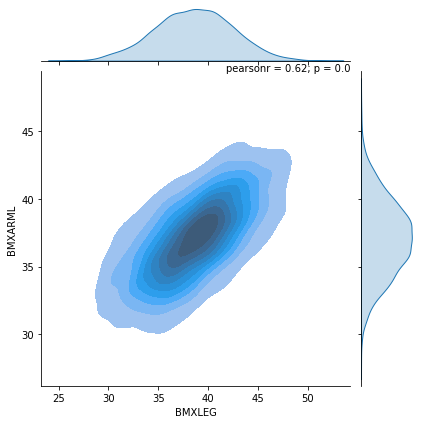

In [2]:
# First solution:

# jointplot returns a jointgrid, which we need to assign to a variable in order to add an annotation
# This line is almost like the original, but it seems that fill is needed explicitly now.
# And most importantly, ".annotate" is not just deprecated. It's gone.
jg = sns.jointplot(x='BMXLEG', y='BMXARML', data=da, kind='kde', fill=True)

# To get the correlation, we need to consider only the records with NA values for either measurement.
da_no_nulls = da[['BMXLEG', 'BMXARML']].dropna()
pearsonr, p = sp.stats.pearsonr(da_no_nulls.BMXLEG, da_no_nulls.BMXARML)
pearson_str = f'pearsonr = {pearsonr:.2f}; p = {p}'

# Placing the annotation somewhere readable requires that we find the max of the axes
jg.ax_joint.text(
    jg.ax_joint._axes.xaxis.get_data_interval()[1],
    jg.ax_joint._axes.yaxis.get_data_interval()[1],
    pearson_str,
    horizontalalignment='right')

plt.show()

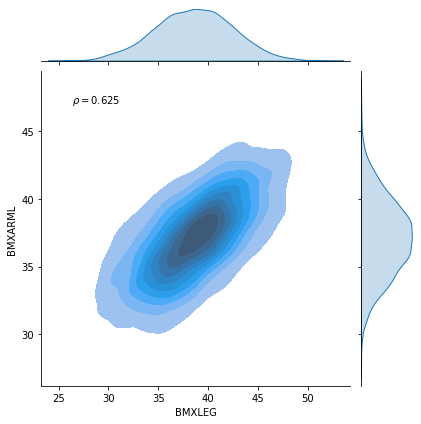

In [5]:
# Second solution:

# create plot
g = sns.jointplot(x="BMXLEG", y="BMXARML", kind='kde', data=da, fill=True)

# create mask to omit NaN values from pearson calc
nonan = ~np.logical_or(np.isnan(da.BMXLEG), np.isnan(da.BMXARML))

# calc pearson value and pvalue
r, p = sp.stats.pearsonr(da.BMXLEG[nonan], da.BMXARML[nonan])

# place pearson value
g.ax_joint.annotate(f'$\\rho = {r:.3f}$', xy=(
    0.1, 0.9), xycoords='axes fraction')

plt.show()

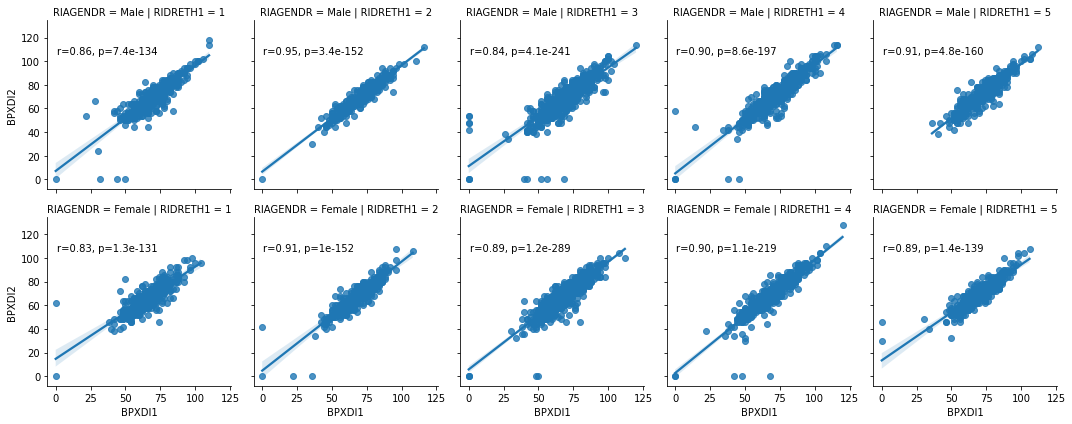

In [4]:
# How to create correlation coefficiant for many plots
''' Question 2
Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.
Stratify the plots by gender (rows) and by race/ethnicity groups (columns).'''

# replace the number values with text
da["RIAGENDR"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

# drop all nulls
da_no_nulls = da[["BPXDI1", "BPXDI2", "RIAGENDR", "RIDRETH1"]].dropna()

# create plot
g = sns.lmplot(x = "BPXDI1", y = "BPXDI2", data = da_no_nulls, row = "RIAGENDR", col = "RIDRETH1",height=3, aspect=1)

# create function about how to calculate correlation
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data["BPXDI1"], data["BPXDI2"])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
# map correlation to every plot    
g.map_dataframe(annotate)
